In [2]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy

In [3]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [4]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [5]:
cities = []
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    if city not in cities:
        cities.append(city)

        len(cities)

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

617

In [7]:
# Import our dependencies and initialize counters and an empty list that will hold the weather data.
import time
from datetime import datetime
import requests
from config import weather_api_key

In [8]:
url = "https://api.openweathermap.org/data/2.5/weather?lat={lat}&lon={lon}&appid=" + weather_api_key

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [10]:
# Loop through the cities list.
for i, city in enumerate(cities):
    
    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)
        
    # Create endpoint url with each city.
    city_url = url + "&q=" + city.replace(" ","+")
    
    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | tasiilaq
Processing Record 2 of Set 1 | grand river south east
City not found. Skipping...
Processing Record 3 of Set 1 | port alfred
Processing Record 4 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 5 of Set 1 | vila franca do campo
Processing Record 6 of Set 1 | stanger
Processing Record 7 of Set 1 | clyde river
Processing Record 8 of Set 1 | chuy
Processing Record 9 of Set 1 | plettenberg bay
Processing Record 10 of Set 1 | kathmandu
Processing Record 11 of Set 1 | mataura
Processing Record 12 of Set 1 | punta arenas
Processing Record 13 of Set 1 | atuona
Processing Record 14 of Set 1 | airai
Processing Record 15 of Set 1 | mehamn
Processing Record 16 of Set 1 | murgab
Processing Record 17 of Set 1 | imeni poliny osipenko
Processing Record 18 of Set 1 | atar
Processing Record 19 of Set 1 | busselton
Processing Record 20 of Set 1 | college
Processing Record 21 of Set 1 | iglesias
Processing Record 22 of Set 1 | kargasok
Processing

Processing Record 38 of Set 4 | morondava
Processing Record 39 of Set 4 | san carlos
Processing Record 40 of Set 4 | padang
Processing Record 41 of Set 4 | vredendal
Processing Record 42 of Set 4 | samarai
Processing Record 43 of Set 4 | affery
Processing Record 44 of Set 4 | umzimvubu
City not found. Skipping...
Processing Record 45 of Set 4 | guiratinga
Processing Record 46 of Set 4 | scottsbluff
Processing Record 47 of Set 4 | calabozo
Processing Record 48 of Set 4 | waipawa
Processing Record 49 of Set 4 | okha
Processing Record 50 of Set 4 | amderma
City not found. Skipping...
Processing Record 1 of Set 5 | gribanovskiy
Processing Record 2 of Set 5 | ponta do sol
Processing Record 3 of Set 5 | fortuna
Processing Record 4 of Set 5 | rio grande
Processing Record 5 of Set 5 | aquidauana
Processing Record 6 of Set 5 | ivdel
Processing Record 7 of Set 5 | haines junction
Processing Record 8 of Set 5 | sitka
Processing Record 9 of Set 5 | puerto escondido
Processing Record 10 of Set 5 | 

Processing Record 27 of Set 8 | meulaboh
Processing Record 28 of Set 8 | karpathos
Processing Record 29 of Set 8 | ocho rios
Processing Record 30 of Set 8 | yatou
Processing Record 31 of Set 8 | denizli
Processing Record 32 of Set 8 | lichinga
Processing Record 33 of Set 8 | bonthe
Processing Record 34 of Set 8 | inhambane
Processing Record 35 of Set 8 | south lake tahoe
Processing Record 36 of Set 8 | boden
Processing Record 37 of Set 8 | mokobeng
Processing Record 38 of Set 8 | lata
Processing Record 39 of Set 8 | lasa
Processing Record 40 of Set 8 | matara
Processing Record 41 of Set 8 | menongue
Processing Record 42 of Set 8 | bowen
Processing Record 43 of Set 8 | blessington
Processing Record 44 of Set 8 | puerto quijarro
Processing Record 45 of Set 8 | jackson
Processing Record 46 of Set 8 | victoria
Processing Record 47 of Set 8 | grindavik
Processing Record 48 of Set 8 | fushun
Processing Record 49 of Set 8 | zhuhai
Processing Record 50 of Set 8 | dingle
Processing Record 1 of 

Processing Record 18 of Set 12 | rehoboth
Processing Record 19 of Set 12 | shunyi
Processing Record 20 of Set 12 | urengoy
Processing Record 21 of Set 12 | severodvinsk
Processing Record 22 of Set 12 | sassandra
Processing Record 23 of Set 12 | ahipara
Processing Record 24 of Set 12 | takaka
Processing Record 25 of Set 12 | estrela
Processing Record 26 of Set 12 | santa maria
Processing Record 27 of Set 12 | hofn
Processing Record 28 of Set 12 | lasam
Processing Record 29 of Set 12 | porbandar
Processing Record 30 of Set 12 | nizhneudinsk
Processing Record 31 of Set 12 | ust-kamchatsk
City not found. Skipping...
Processing Record 32 of Set 12 | chake chake
Processing Record 33 of Set 12 | chagda
City not found. Skipping...
Processing Record 34 of Set 12 | monterey
Processing Record 35 of Set 12 | kalaleh
Processing Record 36 of Set 12 | vagur
Processing Record 37 of Set 12 | inongo
Processing Record 38 of Set 12 | marawi
Processing Record 39 of Set 12 | ancud
Processing Record 40 of Se

In [11]:
len(city_data)

569

In [12]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Tasiilaq,65.6145,-37.6368,278.24,71,100,1.72,GL,2022-04-24 18:18:20
1,Port Alfred,-33.5906,26.8910,288.25,85,95,1.79,ZA,2022-04-24 18:18:21
2,Vila Franca Do Campo,37.7167,-25.4333,289.38,69,13,6.54,PT,2022-04-24 18:18:00
3,Stanger,-29.3282,31.2895,291.09,87,85,3.69,ZA,2022-04-24 18:18:22
4,Clyde River,70.4692,-68.5914,258.28,85,100,2.57,CA,2022-04-24 18:16:06
5,Chuy,-33.6971,-53.4616,297.09,33,0,4.85,UY,2022-04-24 18:18:23
6,Plettenberg Bay,-34.0527,23.3716,286.47,74,11,3.34,ZA,2022-04-24 18:18:24
7,Kathmandu,27.7167,85.3167,292.27,55,20,1.54,NP,2022-04-24 18:16:57
8,Mataura,-46.1927,168.8643,285.08,93,100,2.49,NZ,2022-04-24 18:18:25
9,Punta Arenas,-53.1500,-70.9167,280.21,70,75,1.54,CL,2022-04-24 18:15:40


In [14]:
new_column_order = ['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']
city_data_df=city_data_df[new_column_order]

In [15]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [16]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

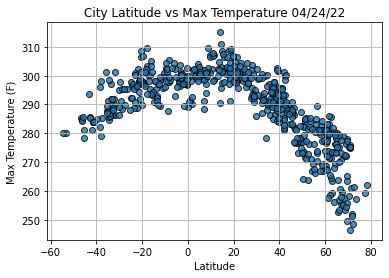

In [17]:
# Import time module
import time
# Build scatter plot for latitude vs max temperature.
plt.scatter(lats,
           max_temps,
           edgecolor="black", linewidth=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

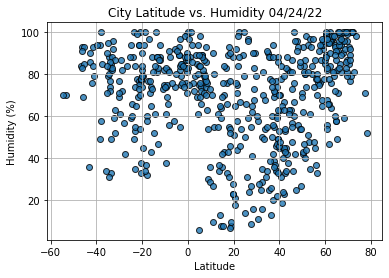

In [18]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

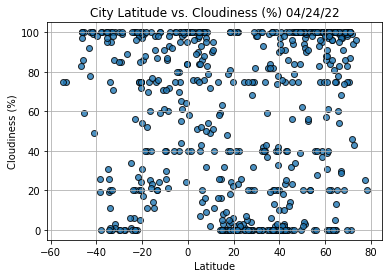

In [19]:
plt.scatter(lats,
           cloudiness,
           edgecolor="black", linewidth=1, marker="o",
           alpha=0.8, label="Cities")

plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

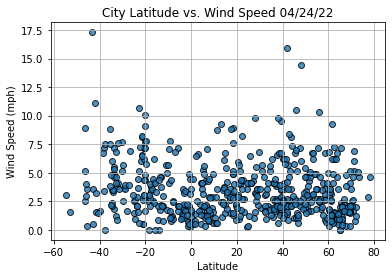

In [20]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()